In [2]:
import random
def random_suffix():
    suffix = ''
    for _ in range(3):
        suffix += str(random.randint(0, 9))
    return suffix

In [38]:
import matplotlib.pyplot as plt
import math
def plot_data(names, data, n, plot_title, exclude = [], plot_name='plot', scale='log'):
    x = range(len(data[0]))
    if scale == 'linear':
        x = [2**i for i in x]
    print(x)
    for (i, row) in enumerate(data):
        y = [i / n for i in row]
        if names[i] in exclude:
            continue
        if "Sort" not in names[i]:
            # make the first two lines wider
            plt.plot(x, y, label=names[i], linewidth=3)
        else:
            plt.plot(x, y, label=names[i])
    
    nlogn_y = [math.log2(n) for i in x]

    plt.plot(x, nlogn_y, 'r--', label='nlogn')

    # x_ticks = [f"{2**i / n:.1f}" for i in x]
    # plt.xticks(x, x_ticks)

    plt.xlabel('error (log scale)')
    plt.ylabel('# comparisons / n')
    plt.title(plot_title)
    plt.legend()
    plt.savefig('plots/' + plot_name + random_suffix() + '.png')
    plt.show()

In [39]:
# load txt 
def read_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    
    # first line is names
    print(lines[0])
    names = lines[0].strip().split(' ')
    lines = lines[1:]

    data = []
    for line in lines:
        row = line.strip().split(' ')
        row_data = [int(num) for num in row if num]
        if row_data:
            data.append(row_data)

    return names, data

In [40]:
def experiment (file_name, n, plot_name, exclude = [], plot_title = 'plot', scale = 'log'):
    names, data = read_data(file_name)
    for (i, datum) in enumerate(data):
        print(names[i], datum)
    plot_data(names, data, n, plot_name, exclude, plot_title, scale)
    # generate random suffix
    

Both LIS MergeSort QuickSort HeapSort TimSort BlockMergeSort InsertionSort 

Both [262, 548, 576, 604, 635, 663, 684, 702, 748, 771, 816, 838, 877, 882, 897, 940, 970, 994, 995, 1014, 1040, 1060, 1074, 1077, 1110, 1129, 1167, 1181, 1197, 1219, 1247, 1250, 1258, 1263, 1298, 1301, 1310, 1334, 1340, 1357, 1355, 1353, 1357, 1377, 1394, 1404, 1399, 1410, 1416, 1420, 1423, 1448, 1456, 1478, 1476, 1487, 1504, 1508, 1514, 1530, 1538]
LIS [262, 374, 468, 551, 619, 692, 734, 780, 810, 886, 942, 986, 1030, 1063, 1092, 1117, 1193, 1197, 1198, 1287, 1264, 1286, 1321, 1374, 1356, 1340, 1395, 1401, 1435, 1458, 1507, 1528, 1517, 1534, 1619, 1600, 1620, 1626, 1651, 1665, 1650, 1674, 1645, 1664, 1687, 1696, 1702, 1742, 1804, 1831, 1830, 1831, 1848, 1808, 1874, 1880, 1861, 1874, 1890, 1933, 1911]
MergeSort [1078, 1102, 1122, 1134, 1148, 1165, 1178, 1194, 1221, 1231, 1233, 1262, 1266, 1283, 1307, 1309, 1342, 1349, 1349, 1359, 1364, 1365, 1376, 1381, 1383, 1375, 1389, 1379, 1389, 1397, 1403, 1410, 1416, 14

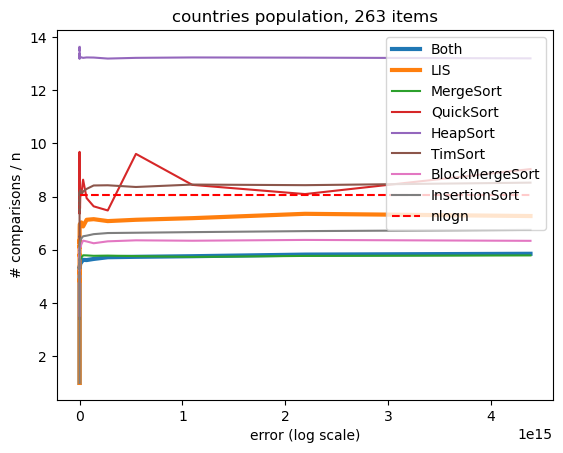

In [72]:
experiment("data/data3.txt", 263, "countries population, 263 items")

Both LIS MergeSort QuickSort HeapSort TimSort BlockMergeSort InsertionSort 

Both [16380, 24511, 29827, 42803, 68042, 104499, 139033, 191027, 240407, 286139, 330713, 379684, 426875, 469131, 503029]
LIS [16380, 20374, 20437, 25757, 37680, 32312, 33196, 34856, 36997, 41473, 51040, 69778, 110157, 186549, 305159]
MergeSort [114685, 116701, 116689, 122824, 132301, 136027, 147395, 152101, 161349, 170904, 178747, 186117, 194482, 201198, 206693]
QuickSort [267956, 268475, 265924, 271181, 280297, 269992, 265528, 277311, 263136, 270768, 265787, 267854, 267404, 272256, 274674]
HeapSort [421565, 421562, 421567, 421525, 421419, 421458, 421188, 421689, 419962, 414607, 418315, 412462, 410281, 409346, 407967]
TimSort [89600, 91622, 91620, 97774, 107299, 111097, 122485, 127527, 137262, 147792, 157896, 169604, 187884, 215399, 255493]
BlockMergeSort [104445, 106462, 106450, 112592, 122081, 125816, 137202, 141966, 151299, 161056, 169280, 177366, 187352, 197193, 208325]
InsertionSort [16380, 18485, 18417, 

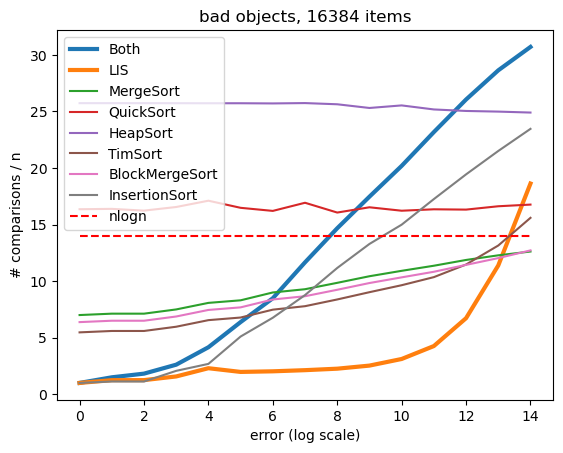

In [63]:
experiment("data/data2.txt", 16384, "bad objects, 16384 items")

Both LIS MergeSort QuickSort HeapSort TimSort BlockMergeSort InsertionSort 

Both [16380, 16893, 30133, 39543, 65780, 92528, 146879, 188464, 249162, 293673, 334302, 382753, 426910, 470017, 503143]
LIS [16380, 16499, 23558, 26993, 31993, 31547, 33979, 34086, 37017, 41049, 50226, 69233, 106480, 179104, 292865]
MergeSort [114680, 114738, 118254, 120995, 127074, 132573, 145936, 153272, 162077, 170658, 178412, 186585, 193603, 201017, 206312]
QuickSort [265732, 273457, 268267, 268702, 269532, 270225, 273142, 269897, 275920, 273251, 270916, 273323, 272139, 269222, 280523]
HeapSort [421560, 421560, 421563, 421561, 421557, 421547, 421535, 421517, 421447, 421310, 421111, 420625, 419591, 417457, 413828]
TimSort [89600, 89659, 93182, 95930, 102044, 107586, 121076, 128633, 137988, 147567, 157382, 170422, 187191, 215757, 255657]
BlockMergeSort [104440, 104498, 108017, 110760, 116846, 122355, 135743, 143121, 152035, 160804, 168940, 177893, 186546, 197233, 208271]
InsertionSort [16380, 16440, 19972, 2

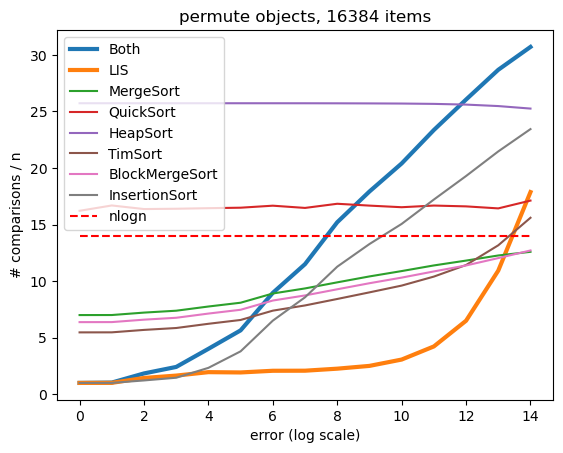

In [64]:
experiment("data/data_permute.txt", 16384, "permute objects, 16384 items")

Both LIS MergeSort QuickSort HeapSort TimSort BlockMergeSort InsertionSort 

Both [16383, 28184, 31953, 32869, 32942, 33474, 34222, 35418, 38608, 43850, 54059, 67674, 83282, 99593, 118340, 139109]
LIS [16383, 16504, 16662, 16949, 17284, 18879, 21152, 24294, 32492, 44506, 62721, 84222, 104002, 121591, 137400, 153781]
MergeSort [114688, 114724, 114763, 114867, 114962, 115406, 116036, 116947, 119418, 122876, 128051, 133614, 138825, 143481, 148699, 153722]
QuickSort [287380, 283284, 283638, 258212, 269159, 270910, 264192, 275159, 285971, 266735, 308970, 267865, 284286, 280668, 293247, 267680]
HeapSort [421566, 421573, 421562, 421560, 421571, 421561, 421501, 421479, 421461, 421261, 420765, 419926, 418471, 416379, 414099, 412329]
TimSort [89600, 89656, 89752, 89898, 90079, 90842, 92109, 93742, 98356, 105395, 117237, 133477, 152067, 170945, 188882, 204234]
BlockMergeSort [104448, 104491, 104556, 104690, 104806, 105409, 106303, 107493, 110944, 115961, 123531, 131765, 140013, 145952, 152647, 15

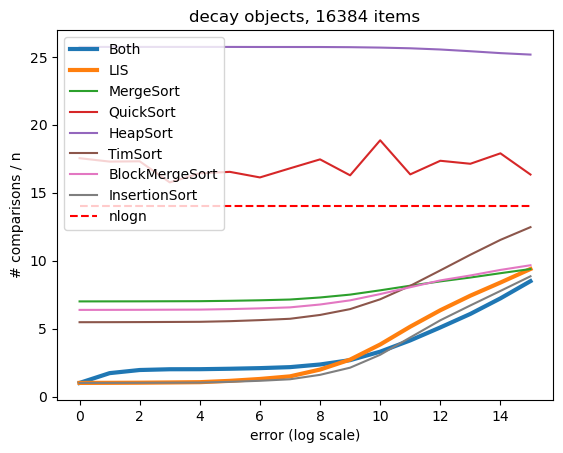

In [65]:
experiment("data/data_decay.txt", 16384, "decay objects, 16384 items")

In [66]:
experiment("data/data_0502_permute.txt", 16384, "random objects, 16384 items")

IndexError: list index out of range

In [ ]:
experiment("data/data_0502_permute.txt", 16384, plot_title="random objects, 16384 items", exclude=['InsertionSort'], plot_name="0502_permute")

IndexError: list index out of range

DirtyClean Both LIS MergeSort QuickSort HeapSort TimSort BlockMergeSort AdaptiveMergeSort InsertionSort 

DirtyClean [32749, 32744, 32751, 32746, 32746, 32748, 32752, 32764, 32933, 32869, 33308, 38519, 44726, 89357, 173118, 355920]
Both [16382, 16382, 16382, 16382, 16382, 16382, 16382, 25881, 30906, 36786, 36802, 38918, 79321, 116488, 408409, 522256]
LIS [16382, 16382, 16382, 16382, 16382, 16382, 16382, 16394, 16421, 24013, 20421, 23701, 51184, 69276, 188211, 388233]
MergeSort [114688, 114688, 114688, 114688, 114688, 114688, 114688, 114690, 114694, 121366, 117404, 118831, 128980, 133791, 172465, 208623]
QuickSort [269225, 266225, 259638, 266079, 271680, 275828, 264479, 269850, 272550, 277868, 269608, 287085, 266925, 283434, 275224, 260879]
HeapSort [421566, 421566, 421566, 421566, 421566, 421566, 421566, 421572, 421573, 408160, 419759, 418669, 409642, 410642, 401610, 408140]
TimSort [89600, 89600, 89600, 89600, 89600, 89600, 89600, 89608, 89616, 96750, 93215, 96454, 112962, 128656, 197

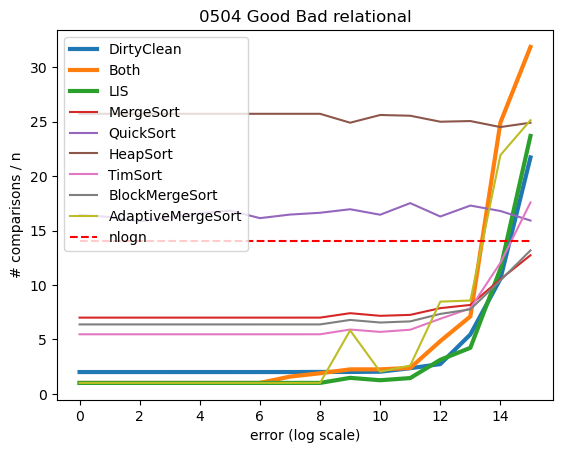

In [8]:
experiment("data/data_goodbad.txt", 16384, plot_title="good-bad", plot_name="0504 Good Bad relational", exclude=['InsertionSort'])

experiment("data/data_badgood.txt", 16384, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS 

DirtyClean [32742, 32748, 32749, 32749, 32750, 32742, 32756, 32754, 32783, 32850, 35721, 38820, 62425, 82997, 173268, 371574]
LIS [16383, 16383, 16383, 16383, 16383, 16383, 16383, 16509, 17271, 17064, 18620, 21993, 38999, 101692, 155428, 388709]
range(0, 16)


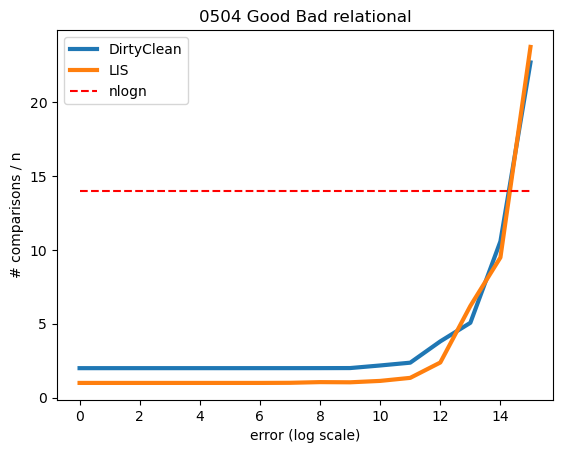

In [14]:
experiment("data/data_goodbad.txt", 16384, plot_title="good-bad", plot_name="0504 Good Bad relational", exclude=['InsertionSort'])

## 0506

DirtyClean LIS naiveDirtyClean 

DirtyClean [32747, 32835, 32842, 33020, 32992, 34313, 36354, 36523, 63510, 55882, 74526, 198982, 207693, 291548, 345162, 358876]
LIS [16382, 23408, 25090, 28084, 32345, 36957, 30768, 34996, 37903, 41686, 50912, 72331, 102658, 183914, 310224, 388053]
naiveDirtyClean [32746, 32952, 32839, 33074, 33084, 34648, 36022, 39584, 106430, 95006, 91775, 131666, 192039, 298816, 369952, 393787]
range(0, 16)


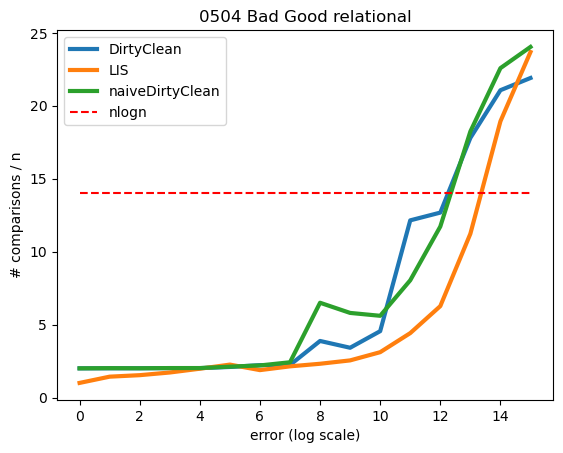

In [20]:
experiment("data/data_badgood.txt", 16384, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean 

DirtyClean [262116, 262309, 262201, 262252, 262294, 262540, 263732, 273134, 272902, 311205, 293182, 744030, 577736, 1228626, 1043966, 1923036, 2708679, 3155599, 3487198]
LIS [131071, 131173, 173175, 257755, 301084, 273452, 266848, 267368, 266428, 275584, 282890, 326171, 367438, 464578, 602121, 1053569, 1554629, 2872687, 3893649]
naiveDirtyClean [262119, 262174, 262184, 262761, 262327, 263022, 263271, 265361, 267083, 310625, 296062, 354013, 419074, 1103862, 1449753, 2891955, 3681028, 3945513, 4045448]
range(0, 19)


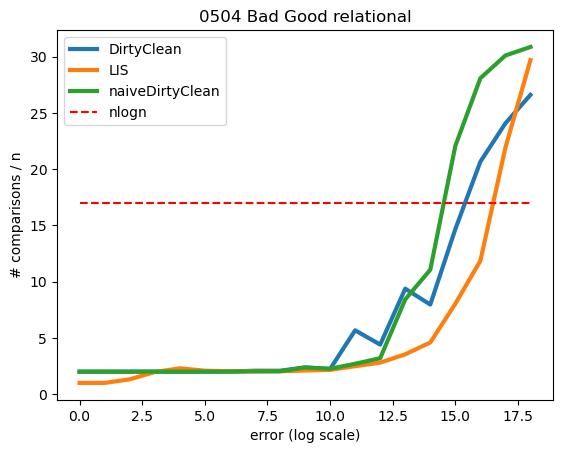

In [21]:
experiment("data/data_badgood_17.txt", 128*1024, plot_title="bad-good-17", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [2030, 2040, 2149, 2408, 2528, 3000, 4208, 5668, 9258, 11439, 14862, 15562]
LIS [1020, 1249, 1470, 2327, 2214, 2575, 2839, 3799, 5023, 8335, 13213, 16051]
naiveDirtyClean [2028, 2039, 2144, 2123, 2464, 3089, 3961, 4642, 8353, 12137, 15347, 16317]
DirtyClean2 [2028, 2042, 2076, 2106, 2336, 2845, 3872, 5196, 7297, 12201, 14957, 15851]
range(0, 12)


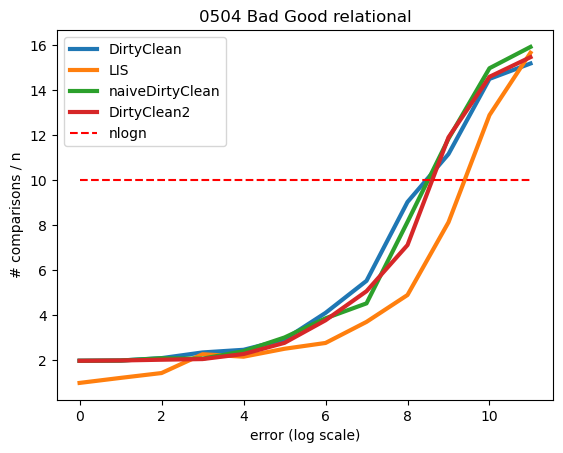

In [25]:
experiment("data/data_badgood.txt", 1024, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [31974, 32000, 32019, 32238, 32862, 33098, 34084, 37102, 59767, 72223, 99509, 141380, 212477, 274127, 329129]
LIS [15990, 18722, 27417, 27756, 30248, 32442, 32770, 35315, 36449, 41486, 51967, 68867, 108596, 178453, 297791]
naiveDirtyClean [31978, 32050, 32035, 32255, 32476, 33366, 41152, 35898, 40391, 55790, 123412, 143972, 226844, 284553, 360460]
DirtyClean2 [31978, 32007, 32023, 32106, 32198, 32398, 32904, 34328, 36824, 42086, 55510, 81618, 144648, 296784, 656512]
range(0, 15)


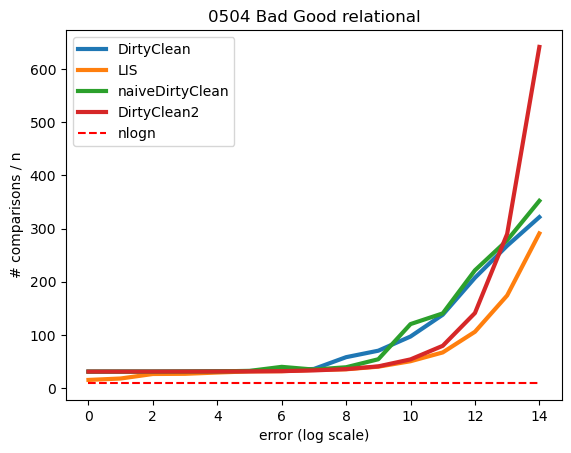

In [26]:
experiment("data/data_badgood.txt", 1024, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [8170, 8213, 8362, 8448, 8859, 9061, 9992, 15393, 19668, 29063, 44852, 57704, 73216, 76043]
LIS [4090, 5686, 6624, 7919, 7663, 8647, 9236, 10159, 12328, 15389, 25082, 38346, 64063, 80691]
naiveDirtyClean [8173, 8202, 8258, 8758, 8712, 9115, 20626, 13944, 19021, 26671, 39834, 64999, 77194, 82325]
DirtyClean2 [8168, 8204, 8240, 8272, 8308, 8575, 9028, 10037, 12243, 16902, 28559, 51311, 110107, 135435]
range(0, 14)


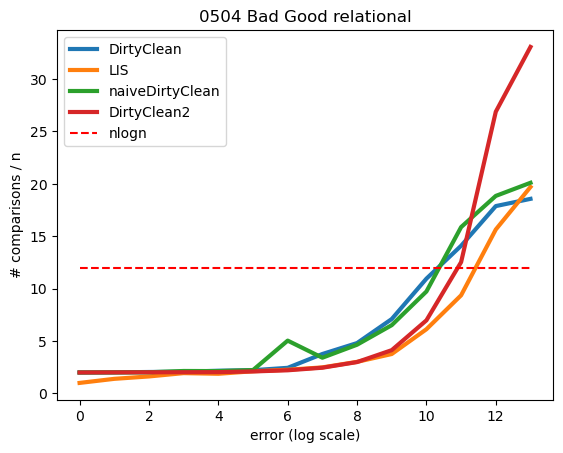

In [28]:
experiment("data/data_badgood.txt", 4096, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [8169, 8208, 8254, 8525, 8885, 9376, 9673, 14082, 20269, 26629, 43890, 61460, 72737, 75637]
LIS [4090, 5168, 7330, 6894, 8747, 8323, 8907, 10262, 11984, 16836, 24893, 37760, 60653, 80708]
naiveDirtyClean [8169, 8225, 8229, 8281, 8648, 9107, 9438, 12396, 18502, 31714, 45788, 60099, 75083, 81619]
DirtyClean2 [8169, 8202, 8254, 8267, 8393, 8758, 8924, 10200, 12616, 18477, 29012, 57159, 117074, 115215]
range(0, 14)


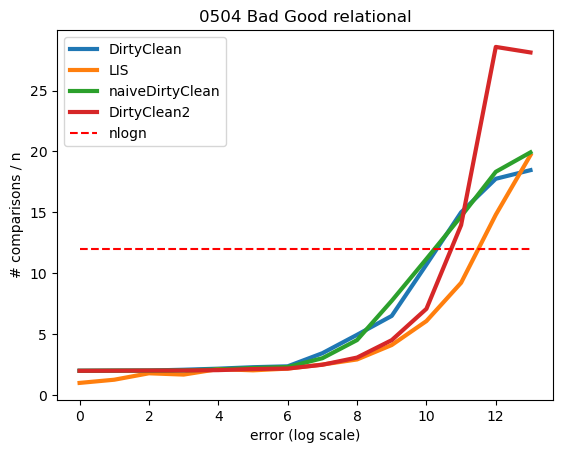

In [30]:
experiment("data/data_badgood.txt", 4096, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'])

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [31974, 32017, 32014, 32662, 34165, 32622, 33314, 39735, 44648, 65114, 78011, 166082, 246205, 274799, 331968]
LIS [15999, 17046, 26028, 27157, 28557, 35589, 33398, 34632, 36976, 39611, 51773, 74398, 116508, 168902, 301296]
naiveDirtyClean [31975, 32037, 32005, 40606, 32314, 33577, 34446, 35063, 40738, 45273, 145240, 113709, 254819, 297980, 383464]
DirtyClean2 [31981, 32000, 32005, 32150, 32218, 32517, 33022, 33792, 35794, 39725, 48002, 66178, 100791, 178703, 387005]
range(0, 15)


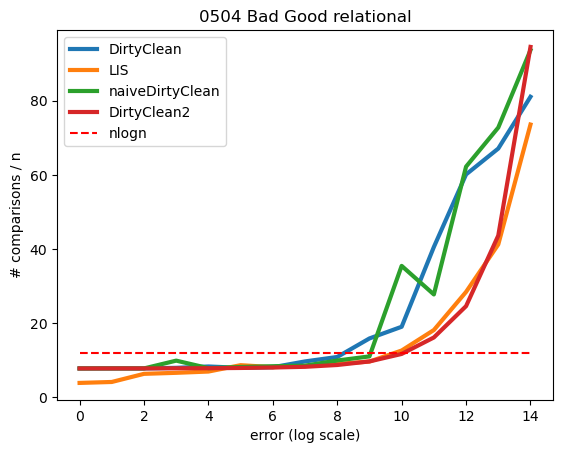

In [35]:
experiment("data/data_badgood.txt", 4096, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'], scale = "linear")

DirtyClean LIS naiveDirtyClean DirtyClean2 

DirtyClean [31974, 32017, 32014, 32662, 34165, 32622, 33314, 39735, 44648, 65114, 78011, 166082, 246205, 274799, 331968]
LIS [15999, 17046, 26028, 27157, 28557, 35589, 33398, 34632, 36976, 39611, 51773, 74398, 116508, 168902, 301296]
naiveDirtyClean [31975, 32037, 32005, 40606, 32314, 33577, 34446, 35063, 40738, 45273, 145240, 113709, 254819, 297980, 383464]
DirtyClean2 [31981, 32000, 32005, 32150, 32218, 32517, 33022, 33792, 35794, 39725, 48002, 66178, 100791, 178703, 387005]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


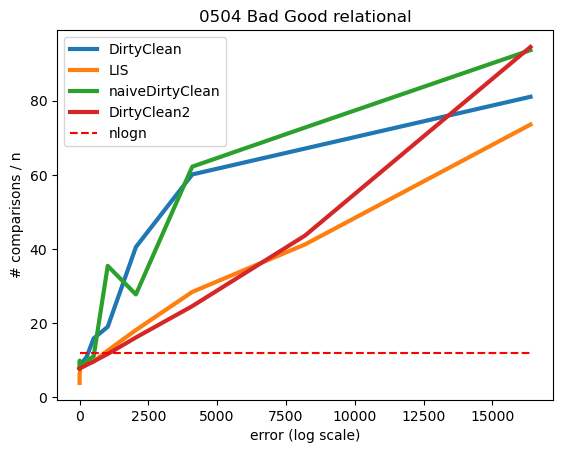

In [41]:
experiment("data/data_badgood.txt", 4096, plot_title="bad-good", plot_name="0504 Bad Good relational", exclude=['InsertionSort'], scale = "linear")